# Clusterization

## K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)

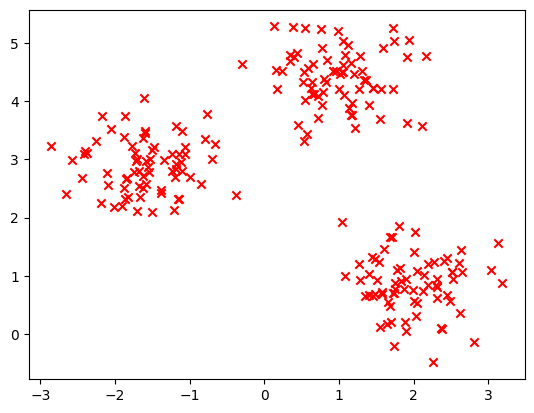

In [2]:
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.show()

In [3]:
# Tworzenie obiektu KMeans z wybranymi parametrami
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

# Dopasowanie modelu do danych
_ = km.fit(X)

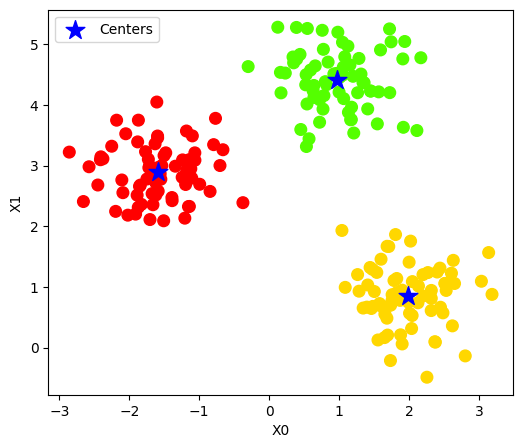

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [5]:
def generate_data_and_clusterize(centers=3, n_clusters=3):
  X, y= make_blobs(n_samples=210, centers=centers, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)
  km = KMeans(
    n_clusters=n_clusters,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
  )

  _ = km.fit(X)

  return km, X, y

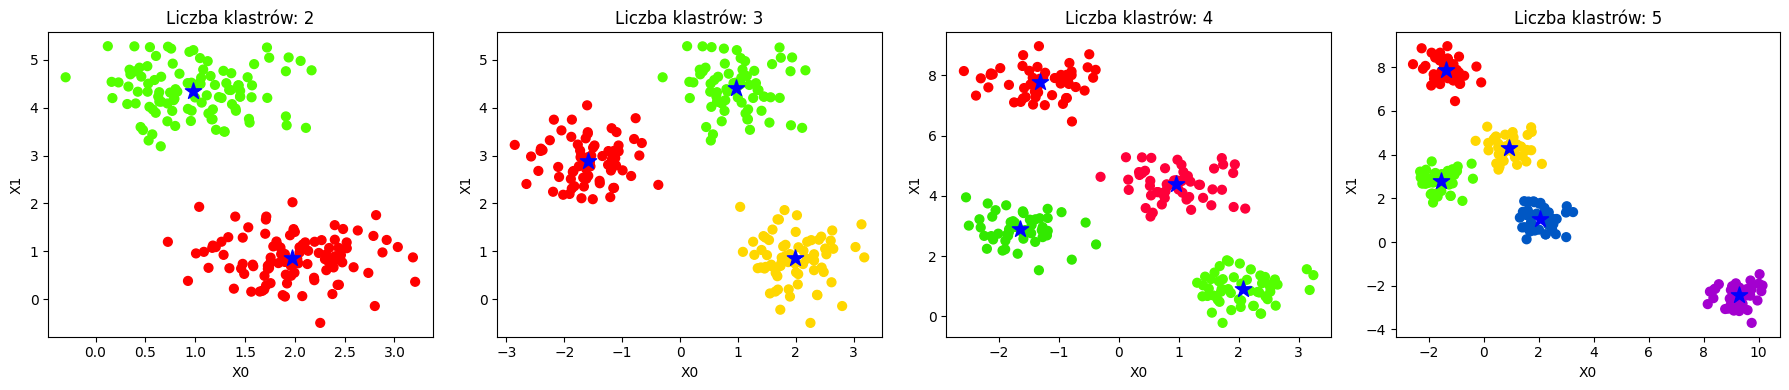

In [6]:
n = 4
fig, axes = plt.subplots(1, n, figsize=(18, 4))

for i in range(n):
  n_clusters = i + 2
  knn, X, y = generate_data_and_clusterize(n_clusters, n_clusters)
  axes[i].scatter(X[:, 0], X[:, 1], c=knn.labels_, cmap=plt.cm.prism, s=40)
  axes[i].scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], marker='*', s=150, color='blue')
  axes[i].set_title(f'Liczba klastrów: {n_clusters}')
  axes[i].set_xlabel('X0')
  axes[i].set_ylabel('X1')

plt.tight_layout()
plt.show()